In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [4]:
df.shape

(1525, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


# Duplicate Removal

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [7]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517,NaN,NaN,NaN,54.2413,15.7017,24,41,53,67,93
economic.cond.national,1517,NaN,NaN,NaN,3.24522,0.881792,1,3,3,4,5
economic.cond.household,1517,NaN,NaN,NaN,3.13777,0.931069,1,3,3,4,5
Blair,1517,NaN,NaN,NaN,3.33553,1.17477,1,2,4,4,5
Hague,1517,NaN,NaN,NaN,2.74951,1.23248,1,2,2,4,5
Europe,1517,NaN,NaN,NaN,6.74028,3.29904,1,4,6,10,11
political.knowledge,1517,NaN,NaN,NaN,1.54054,1.08442,0,0,2,2,3
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.age.value_counts()

37    42
49    39
47    38
35    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64

In [11]:
df.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [12]:
df=df.rename(columns={'economic.cond.national':'economic_cond_national','economic.cond.household':'economic_cond_household'})

In [13]:
df=df.rename(columns={'political.knowledge':'political_knowledge'})

In [14]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


3    604
4    538
2    256
5     82
1     37
Name: economic_cond_national, dtype: int64


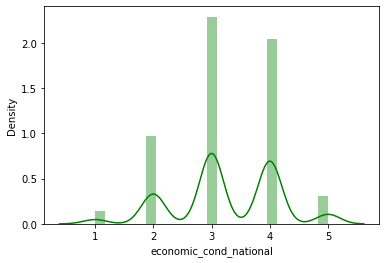

In [15]:
sns.distplot(df['economic_cond_national'], kde=True, color='g')
print(df.economic_cond_national.value_counts())

3    645
4    435
2    280
5     92
1     65
Name: economic_cond_household, dtype: int64


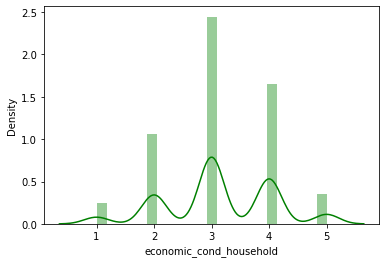

In [16]:
sns.distplot(df['economic_cond_household'], kde=True, color='g')
print(df.economic_cond_household.value_counts())

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


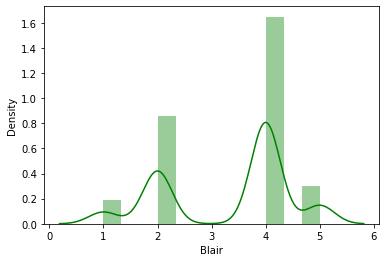

In [17]:
sns.distplot(df['Blair'], kde=True, color='g')
print(df.Blair.value_counts())

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


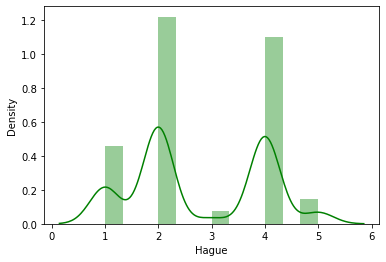

In [18]:
sns.distplot(df['Hague'], kde=True, color='g')
print(df.Hague.value_counts())

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64


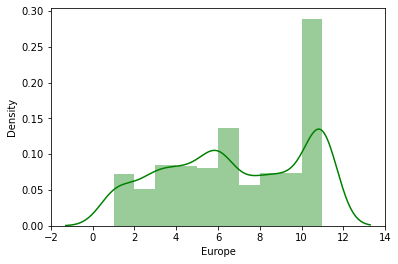

In [19]:
sns.distplot(df['Europe'], kde=True, color='g')
print(df.Europe.value_counts())

2    776
0    454
3    249
1     38
Name: political_knowledge, dtype: int64


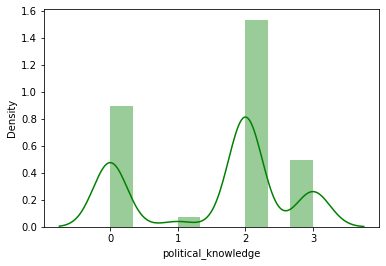

In [20]:
sns.distplot(df['political_knowledge'], kde=True, color='g')
print(df.political_knowledge.value_counts())

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1520    False
1521    False
1522    False
1523    False
1524    False
Length: 1517, dtype: bool

# Null Handling

In [22]:
def get_null_value_report(df):
  null_val = pd.DataFrame(df.dtypes).T.rename(index = {0:'Columns Type'})
  null_val = null_val.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:'Null Value'}))
  null_val = null_val.append(pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,2)).T.rename(index = {0:'Percentage'}))
  return null_val
  
get_null_value_report(df).head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
Columns Type,object,int64,int64,int64,int64,int64,int64,int64,object
Null Value,0,0,0,0,0,0,0,0,0
Percentage,0,0,0,0,0,0,0,0,0


# Missing Values

In [23]:
#inputation in categorical data
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].fillna(df[col].mode()[0])

#inputation in numerical data
for col in df.select_dtypes(include='number').columns:
  df[col] = df[col].fillna(df[col].median())

get_null_value_report(df).head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
Columns Type,object,int64,int64,int64,int64,int64,int64,int64,object
Null Value,0,0,0,0,0,0,0,0,0
Percentage,0,0,0,0,0,0,0,0,0


In [24]:
def univariateAnalysis_numeric(column):
    fig, axes = plt.subplots(nrows=2,ncols=2)
    fig.set_size_inches(10, 15)
    print("Univariate of " + column)
    print("----------------------------------------------------------------------------")
    a = sns.distplot(df[column], kde=True, color='g', ax=axes[0][0]);
    a.set_title('Distribution of '+str(column))
    b = sns.boxenplot(x=df[column],color='r', ax=axes[0][1])
    b.set_title('Skewness of '+str(column))
    c = sns.boxplot(x=df[column],ax=axes[1][0])
    c.set_title('Outlier of '+str(column))
    d = sns.scatterplot(x=df.index,y=df[column],color='orange',ax=axes[1][1])
    d.set_title('Spread of '+str(column))


Univariate of age
----------------------------------------------------------------------------


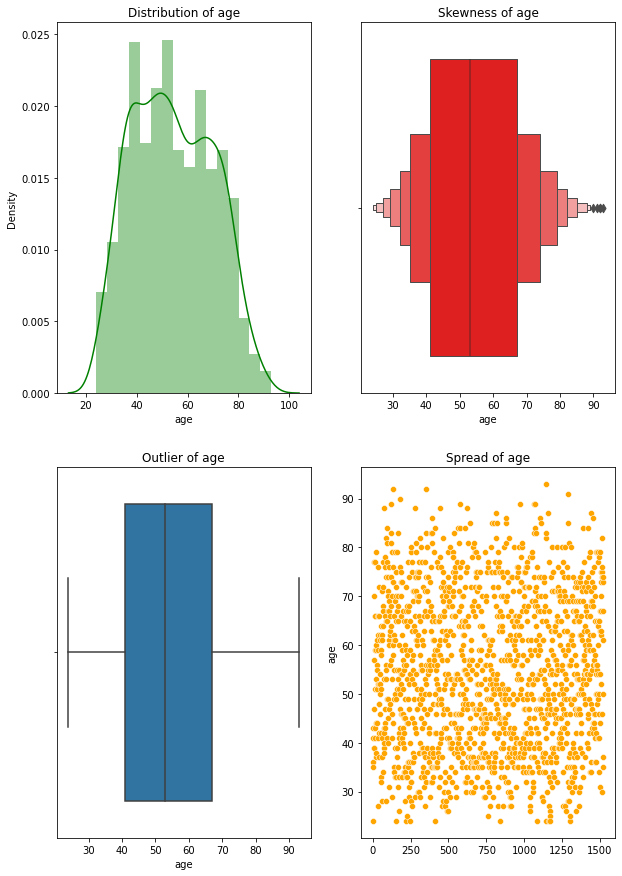

In [25]:
univariateAnalysis_numeric('age')

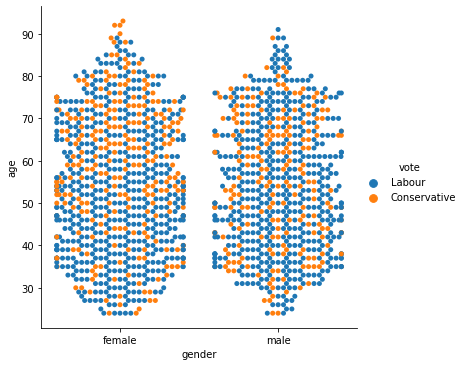

In [26]:
g = sns.catplot(x="gender",
                y="age",               
                hue='vote',
                data=df, 
                kind="swarm")

In [27]:
pd.crosstab(df.gender,df.vote, normalize=True,margins=True)

vote,Conservative,Labour,All
gender,,,
female,0.169413,0.363217,0.53263
male,0.133817,0.333553,0.46737
All,0.303230,0.696770,1.00000


In [28]:
pd.crosstab(df.economic_cond_household,[df.vote,df.gender],margins=True)

vote                    Conservative      Labour        All
gender                        female male female male      
economic_cond_household                                    
1                                 14   14     23   14    65
2                                 68   58     85   69   280
3                                117   80    231  217   645
4                                 48   38    177  172   435
5                                 10   13     35   34    92
All                              257  203    551  506  1517

In [29]:
#sns.set(style="whitegrid")

<Figure size 1080x1080 with 0 Axes>

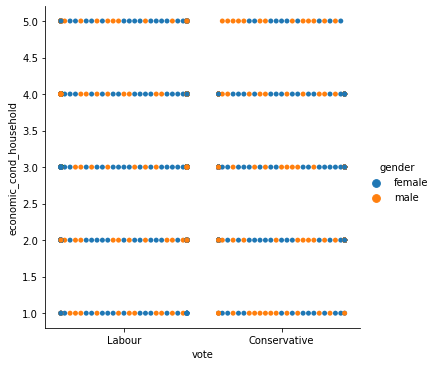

In [30]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x="vote",y='economic_cond_household',hue='gender',data=df,kind='swarm',aspect=1)


In [31]:
pd.crosstab(df.economic_cond_household,df.vote,normalize=True,margins=True)

vote,Conservative,Labour,All
economic_cond_household,,,
1,0.018457,0.024390,0.042848
2,0.083059,0.101516,0.184575
3,0.129862,0.295320,0.425181
4,0.056691,0.230059,0.286750
5,0.015162,0.045485,0.060646
All,0.303230,0.696770,1.000000


In [32]:
pd.crosstab(df.economic_cond_national,[df.vote,df.gender],margins=True)

vote                   Conservative      Labour        All
gender                       female male female male      
economic_cond_national                                    
1                                12    9     11    5    37
2                                74   66     64   52   256
3                               116   83    223  182   604
4                                51   40    220  227   538
5                                 4    5     33   40    82
All                             257  203    551  506  1517

<Figure size 1080x1080 with 0 Axes>

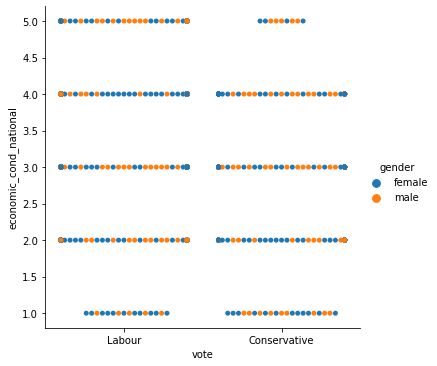

In [33]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x="vote",y='economic_cond_national',hue='gender',data=df,kind='swarm',aspect=1)

In [34]:
pd.crosstab(df.Hague,[df.gender],margins=True)

gender,female,male,All
Hague,,,
1,112,121,233
2,329,288,617
3,24,13,37
4,309,248,557
5,34,39,73
All,808,709,1517


<Figure size 1080x1080 with 0 Axes>

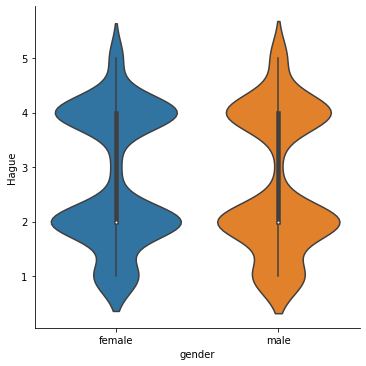

In [35]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x='gender',y='Hague',data=df,kind='violin',aspect=1)

In [36]:
pd.crosstab(df.Europe,[df.vote,df.gender],margins=True)

vote   Conservative      Labour        All
gender       female male female male      
Europe                                    
1                 4    1     46   58   109
2                 4    2     27   44    77
3                 7    7     51   63   128
4                13    5     51   57   126
5                 8   12     54   49   123
6                23   12    105   67   207
7                21   11     32   22    86
8                24   24     33   30   111
9                25   31     28   27   111
10               32   22     28   19   101
11               96   76     96   70   338
All             257  203    551  506  1517

<Figure size 1080x1080 with 0 Axes>

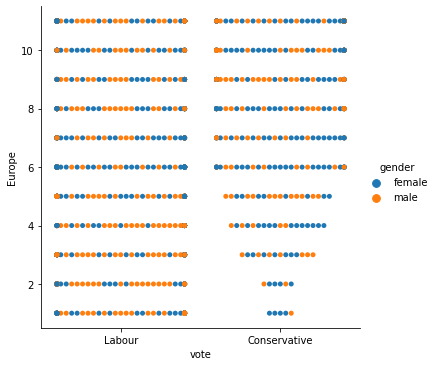

In [37]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x='vote',y='Europe',hue='gender',data=df,kind='swarm',aspect=1)

In [38]:
pd.crosstab(df.Blair,[df.gender],margins=True)

gender,female,male,All
Blair,,,
1,52,45,97
2,255,179,434
3,0,1,1
4,432,401,833
5,69,83,152
All,808,709,1517


<Figure size 1080x1080 with 0 Axes>

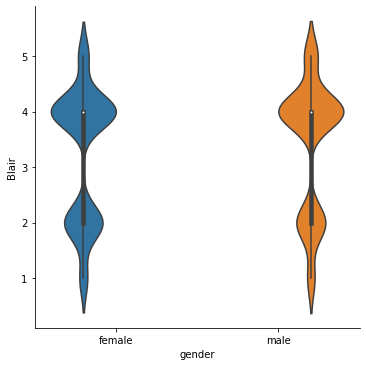

In [39]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x='gender',y='Blair',hue='gender',data=df,kind='violin',aspect=1)

In [40]:
pd.crosstab(df.political_knowledge,[df.vote,df.gender],margins=True)

vote                Conservative      Labour        All
gender                    female male female male      
political_knowledge                                    
0                             56   38    225  135   454
1                              5    6     18    9    38
2                            168  115    251  242   776
3                             28   44     57  120   249
All                          257  203    551  506  1517

<Figure size 1080x1080 with 0 Axes>

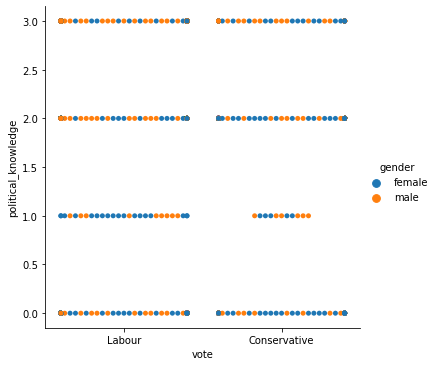

In [41]:
fig = plt.figure(figsize =(15, 15))
g=sns.catplot(x='vote',y='political_knowledge',hue='gender',data=df,kind='swarm',aspect=1)

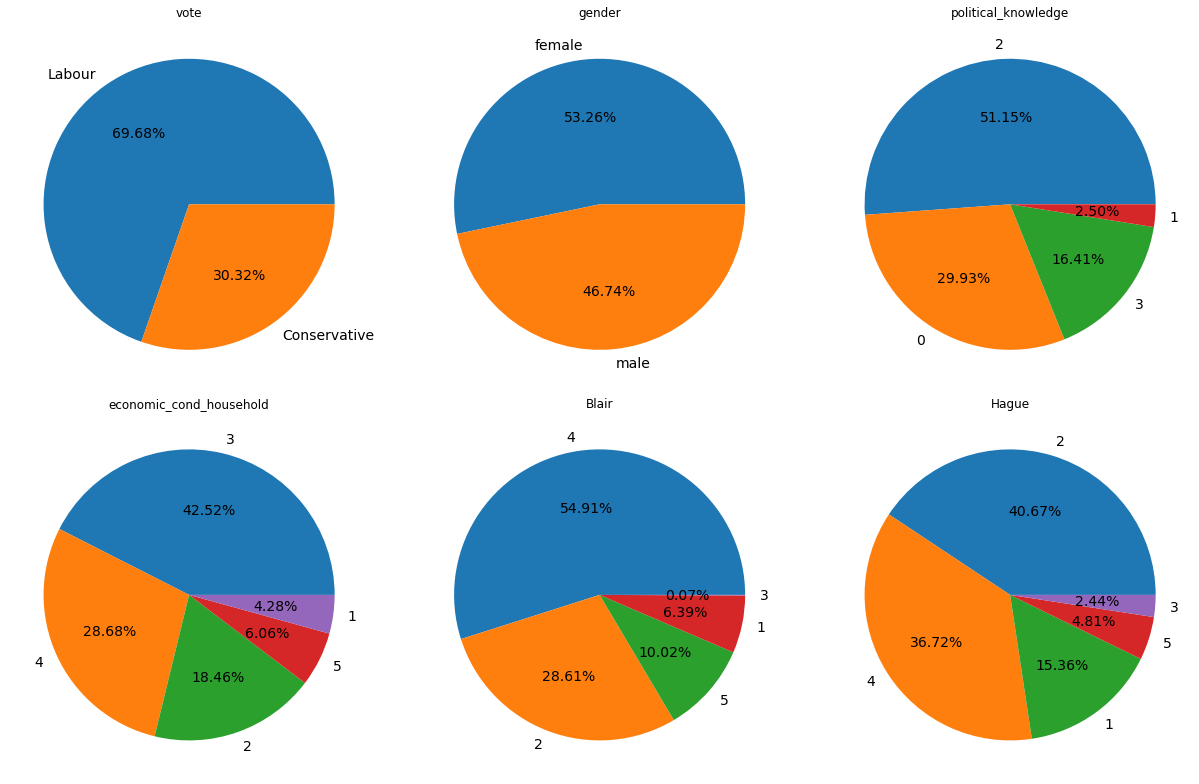

In [42]:
fig, axes = plt.subplots(2,3, figsize=(17,11))
axes = [col for rows in axes for col in rows]
col_nm=['vote','gender','political_knowledge','economic_cond_household','Blair','Hague']
for index, col in enumerate(col_nm):
  plot = df[col].value_counts().plot(kind='pie', title=col, autopct='%1.2f%%', fontsize=14, ax=axes[index])
  plot = axes[index].set_ylabel('')
plt.tight_layout()

<AxesSubplot:title={'center':'Hague'}, ylabel='Europe'>

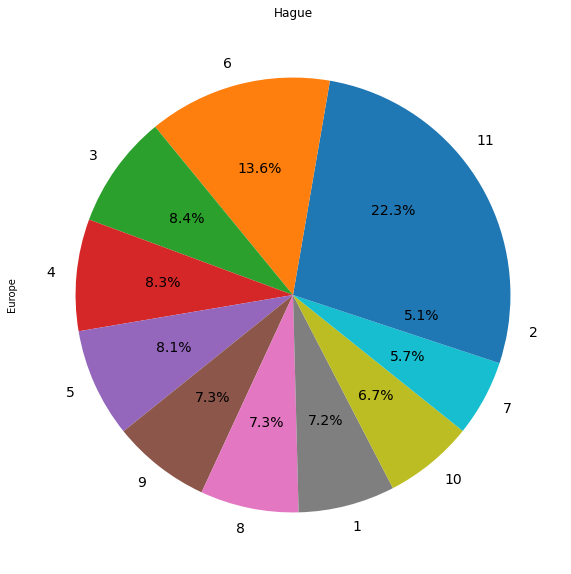

In [43]:

df['Europe'].value_counts().plot(kind='pie', title=col, autopct='%1.1f%%',shadow=False, fontsize=14,figsize=(10,10))


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic_cond_national   1517 non-null   int64 
 3   economic_cond_household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 158.5+ KB


In [45]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


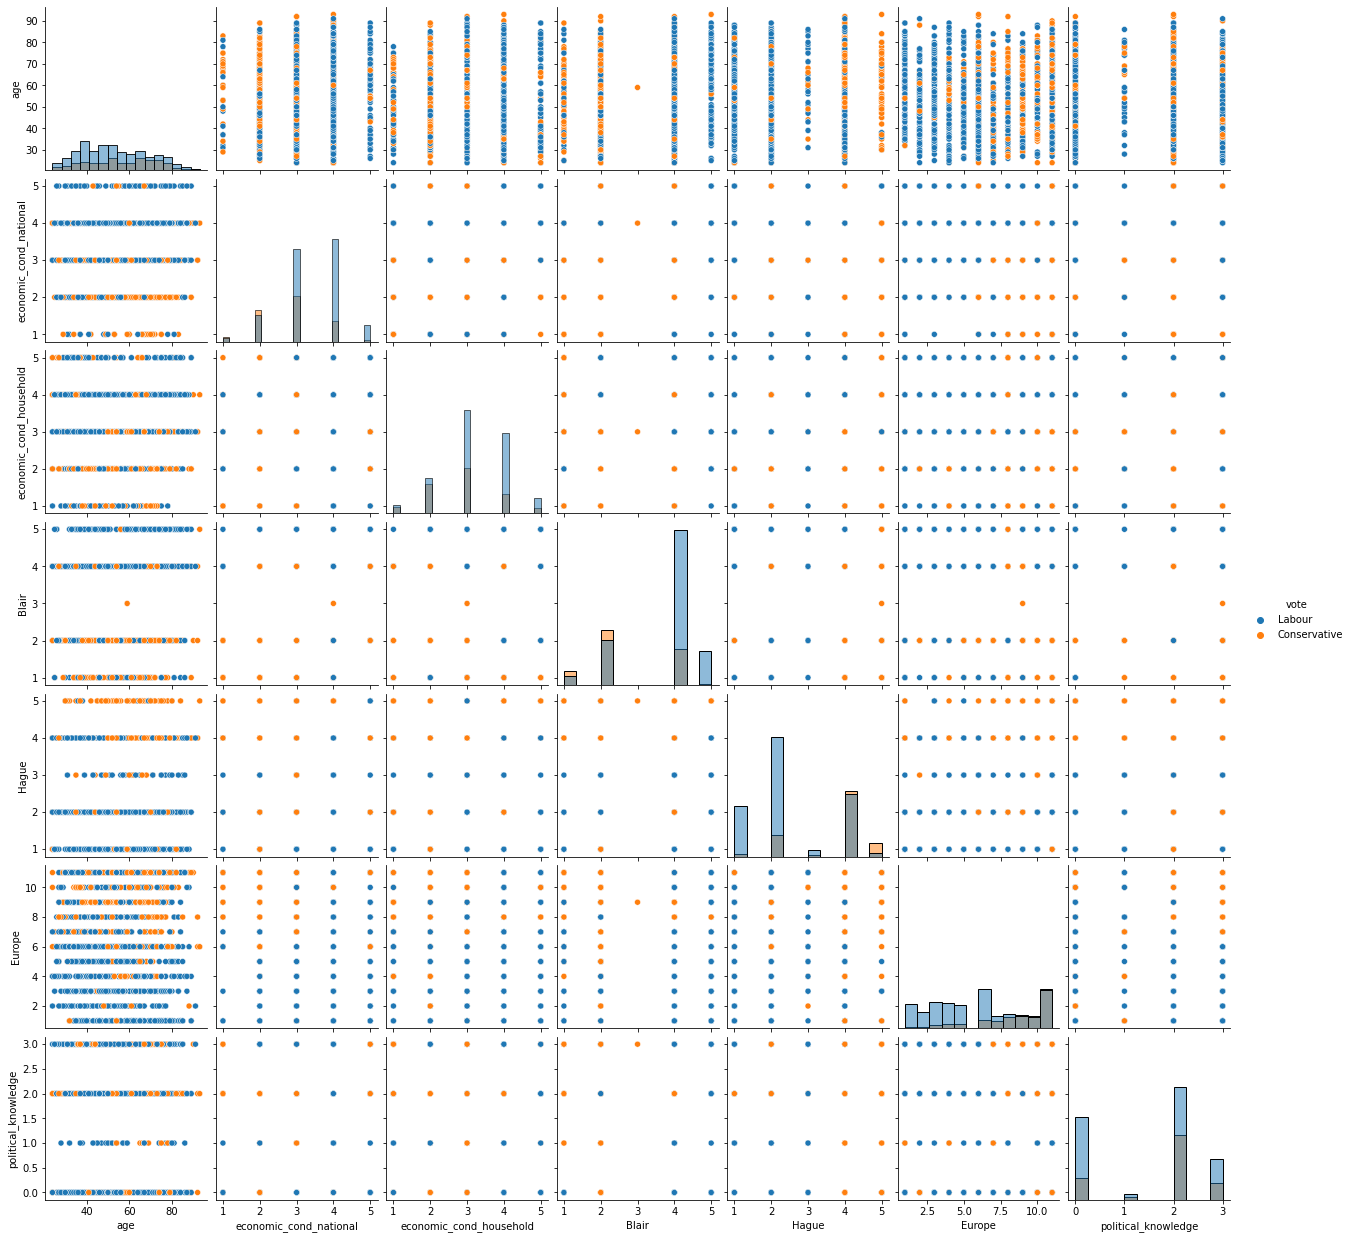

In [46]:
sns.pairplot(df ,diag_kind='hist' ,hue='vote');

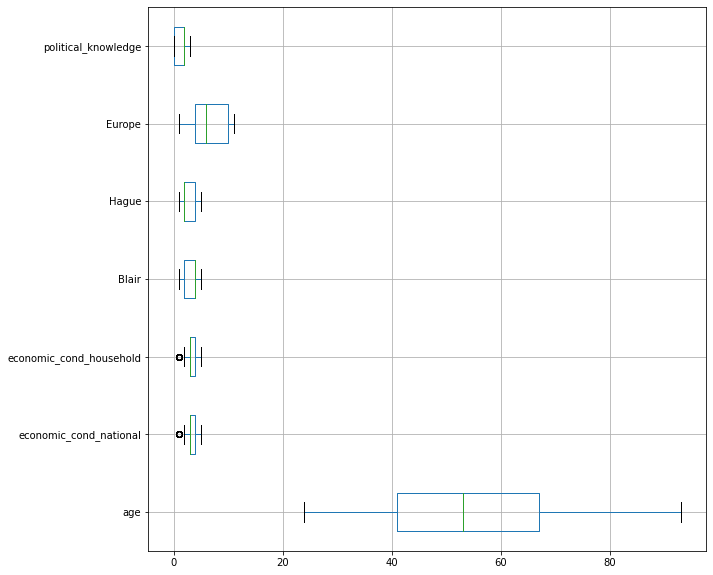

In [47]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

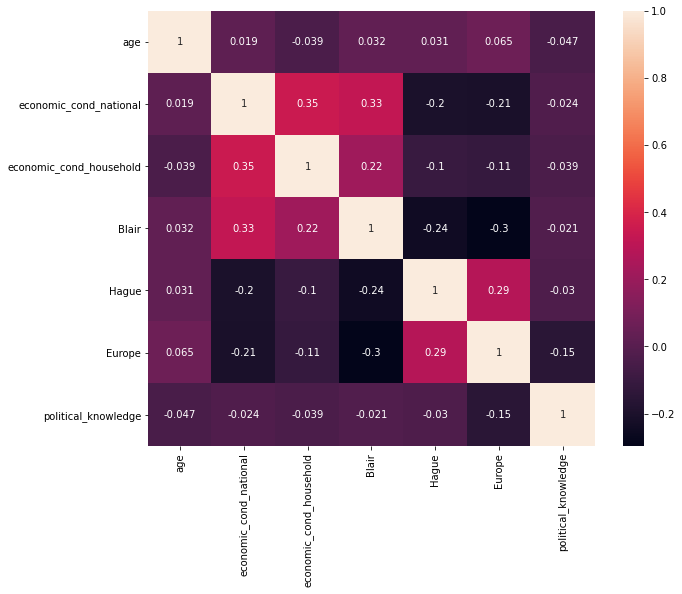

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic_cond_national   1517 non-null   int64 
 3   economic_cond_household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 158.5+ KB


In [50]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge']


In [51]:
print(cat)

['vote', 'gender']


In [52]:
model_df =pd.get_dummies(df, columns=cat,drop_first=True)

In [53]:
model_df

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


In [54]:
def detect_outlers(col_nm):
    Q1 = np.percentile(model_df[col_nm], 25,interpolation = 'midpoint')
    Q3 = np.percentile(model_df[col_nm], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(model_df[col_nm] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(model_df[col_nm] <= (Q1-1.5*IQR))
    total_outliers=upper[0].shape+lower[0].shape
    tot_obs=model_df[col_nm].count()
    if IQR==0 & total_outliers[0]==0:
        pct_out=0.00
        print('Total Outliers in',col_nm, 'is',0,'.Percentage of outliers is',pct_out,'%')
    else:
        pct_out=((total_outliers[0]/tot_obs)*100).round(2)
        print('Total Outliers in',col_nm, 'is',total_outliers[0],'.Percentage of outliers is',pct_out,'%')
    

In [55]:
numeric_col=model_df.select_dtypes(include=['float64','int64']).columns

In [56]:
for col_nm in numeric_col:
    detect_outlers(col_nm)

Total Outliers in age is 0 .Percentage of outliers is 0.0 %
Total Outliers in economic_cond_national is 0 .Percentage of outliers is 0.0 %
Total Outliers in economic_cond_household is 0 .Percentage of outliers is 0.0 %
Total Outliers in Blair is 0 .Percentage of outliers is 0.0 %
Total Outliers in Hague is 0 .Percentage of outliers is 0.0 %
Total Outliers in Europe is 0 .Percentage of outliers is 0.0 %
Total Outliers in political_knowledge is 0 .Percentage of outliers is 0.0 %


In [57]:
model_df

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


# Cut Age

In [58]:
model_df['age_group']=pd.cut(model_df['age'],[20,30,40,50,60,70,80,90])

In [59]:
model_df.age_group.isnull().sum()

4

In [60]:
model_df['age_group']=pd.cut(model_df['age'],[20,30,40,50,60,70,80,90,100])

In [61]:
model_df.age_group.isnull().sum()

0

In [71]:
model_df.age_group.value_counts()

(40, 50]     313
(30, 40]     285
(50, 60]     282
(60, 70]     275
(70, 80]     224
(20, 30]      76
(80, 90]      58
(90, 100]      4
Name: age_group, dtype: int64

In [74]:
model_df['age_grp']=pd.Categorical(model_df['age_group'],ordered=True).codes
model_df['age_grp'].unique()

array([2, 1, 0, 3, 5, 4, 6, 7], dtype=int8)

In [76]:
model_df=model_df.drop(['age','age_group'],axis=1)
model_df

,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male,age_grp
0,3,3,4,1,2,2,1,0,2
1,4,4,4,4,5,2,1,1,1
2,4,4,5,2,3,2,1,1,1
3,4,2,2,1,4,0,1,0,0
4,2,2,1,1,6,2,1,1,2
...,...,...,...,...,...,...,...,...,...
1520,5,3,2,4,11,3,0,1,4
1521,2,2,4,4,8,2,0,1,5
1522,3,3,5,4,2,2,1,1,1
1523,3,3,1,4,11,2,0,1,4


# Scaling

In [77]:
model_scaled_df=pd.get_dummies(df, columns=cat,drop_first=True)

In [78]:
model_scaled_df

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


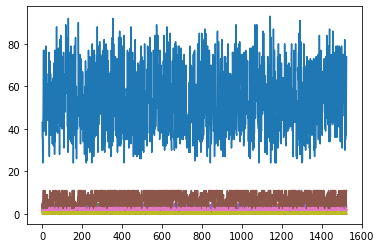

In [79]:
plt.plot(model_scaled_df)

In [80]:
print(numeric_col)

Index(['age', 'economic_cond_national', 'economic_cond_household', 'Blair',
       'Hague', 'Europe', 'political_knowledge'],
      dtype='object')


In [81]:
model_scaled_df[numeric_col] = model_scaled_df[numeric_col].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
model_scaled_df

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1,0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1,0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,1
...,...,...,...,...,...,...,...,...,...
1520,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,0,1
1521,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,0,1
1522,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,1,1
1523,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,0,1


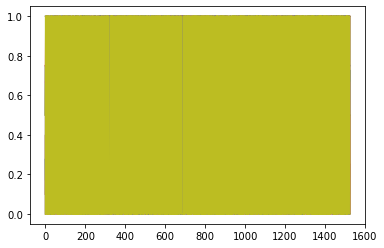

In [82]:
plt.plot(model_scaled_df)


# Data Split

In [83]:
# Copy all the predictor variables into X dataframe
X = model_df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = model_df['vote_Labour']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [85]:
print('Train Dataset ',X_train.shape[0])
print('Test Dataset ',X_test.shape[0])

Train Dataset  1061
Test Dataset  456


In [86]:
X_test.shape[0]

456

In [87]:
len(y_train)

1061

In [88]:
len(y_test)

456

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

# Logistic Model

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
logis_model = LogisticRegression()
logis_model.fit(X_train, y_train)

LogisticRegression()

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


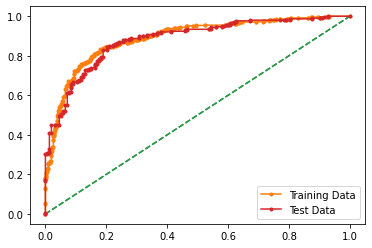

In [90]:
# AUC and ROC for the training data

# calculate AUC
probs = logis_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
logr_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % logr_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = logis_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
logr_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % logr_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [91]:
ytrain_predict = logis_model.predict(X_train)
ytest_predict = logis_model.predict(X_test)

Text(0.5, 1.0, 'Logistic Train')

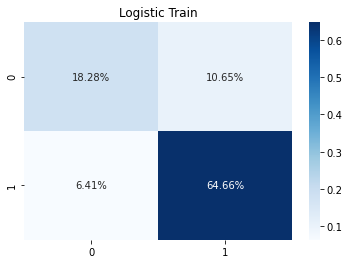

In [92]:
cf_train=confusion_matrix(y_train, ytrain_predict)
cf_train
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('Logistic Train')

Text(0.5, 1.0, 'Logistic Test')

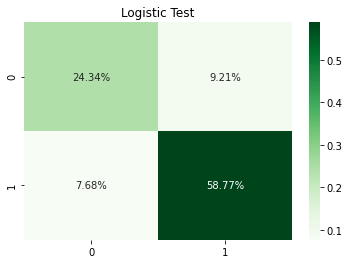

In [93]:
cf_test=confusion_matrix(y_test, ytest_predict)
cf_test
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('Logistic Test')

In [94]:
logr_test_accuracy = logis_model.score(X_test, y_test)
logr_test_accuracy
logr_train_accuracy = logis_model.score(X_train, y_train)
logr_train_accuracy
logr_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
logr_train_df=pd.DataFrame(logr_metrics_train).transpose()
logr_train_f1=round(logr_train_df.loc["1"][2],2)
logr_train_recall=round(logr_train_df.loc["1"][1],2)
logr_train_precision=round(logr_train_df.loc["1"][0],2)
print ('logr_train_accuracy ',logr_train_accuracy)
print ('logr_train_precision ',logr_train_precision)
print ('logr_train_recall ',logr_train_recall)
print ('logr_train_f1 ',logr_train_f1)
logr_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
logr_test_df=pd.DataFrame(logr_metrics_test).transpose()
logr_test_f1=round(logr_test_df.loc["1"][2],2)
logr_test_recall=round(logr_test_df.loc["1"][1],2)
logr_test_precision=round(logr_test_df.loc["1"][0],2)
print ('logr_test_accuracy ',logr_test_accuracy)
print ('logr_test_precision ',logr_test_precision)
print ('logr_test_recall ',logr_test_recall)
print ('logr_test_f1 ',logr_test_f1)

logr_train_accuracy  0.8294062205466541
logr_train_precision  0.86
logr_train_recall  0.91
logr_train_f1  0.88
logr_test_accuracy  0.831140350877193
logr_test_precision  0.86
logr_test_recall  0.88
logr_test_f1  0.87


# LDA Model

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [99]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

In [100]:
ytrain_predict = lda_model.predict(X_train)
ytest_predict = lda_model.predict(X_test)

Text(0.5, 1.0, 'LDA Train')

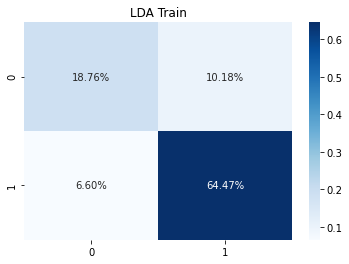

In [101]:
cf_train=confusion_matrix(y_train, ytrain_predict)
cf_train
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('LDA Train')

Text(0.5, 1.0, 'LDA Test')

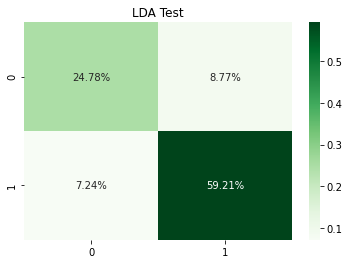

In [102]:
cf_test=confusion_matrix(y_test, ytest_predict)
cf_test
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('LDA Test')

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


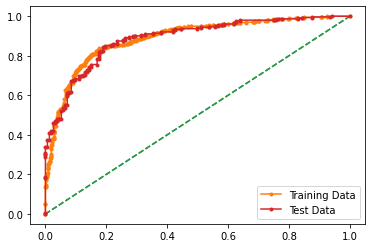

In [103]:
# AUC and ROC for the training data

# calculate AUC
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
lda_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
lda_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



In [104]:
lda_test_accuracy = lda_model.score(X_test, y_test)
lda_test_accuracy
lda_train_accuracy = lda_model.score(X_train, y_train)
lda_train_accuracy
lda_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
lda_train_df=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(lda_train_df.loc["1"][2],2)
lda_train_recall=round(lda_train_df.loc["1"][1],2)
lda_train_precision=round(lda_train_df.loc["1"][0],2)
print ('lda_train_accuracy ',lda_train_accuracy)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
lda_test_df=pd.DataFrame(lda_metrics_test).transpose()
lda_test_f1=round(lda_test_df.loc["1"][2],2)
lda_test_recall=round(lda_test_df.loc["1"][1],2)
lda_test_precision=round(lda_test_df.loc["1"][0],2)
print ('lda_test_accuracy ',lda_test_accuracy)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_train_accuracy  0.8322337417530632
lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.88
lda_test_accuracy  0.8399122807017544
lda_test_precision  0.87
lda_test_recall  0.89
lda_test_f1  0.88


In [105]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
log_lda_data = pd.DataFrame({'LogR Train':[logr_train_accuracy,logr_train_auc,logr_train_recall,logr_train_precision,logr_train_f1],
        'LogR Test':[logr_test_accuracy,logr_test_auc,logr_test_recall,logr_test_precision,logr_test_f1],
       'LDA Train':[lda_train_accuracy,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_accuracy,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(log_lda_data*100,2)

,LogR Train,LogR Test,LDA Train,LDA Test
Accuracy,82.94,83.11,83.22,83.99
AUC,88.95,88.28,88.87,88.81
Recall,91.00,88.00,91.00,89.00
Precision,86.00,86.00,86.00,87.00
F1 Score,88.00,87.00,88.00,88.00


# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# kNN

In [321]:
from sklearn.neighbors import KNeighborsClassifier

In [322]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [323]:
ytrain_predict = knn_model.predict(X_train)
ytest_predict = knn_model.predict(X_test)

AUC for the Training Data: 0.930
AUC for the Test Data: 0.882


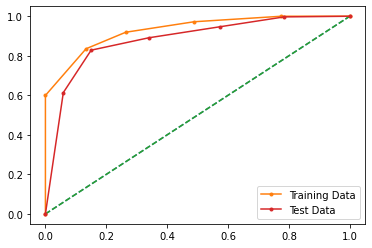

In [324]:
# AUC and ROC for the training data

# calculate AUC
probs = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
knn_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % knn_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
knn_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % knn_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

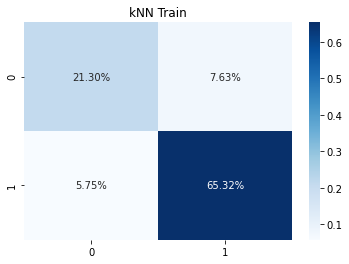

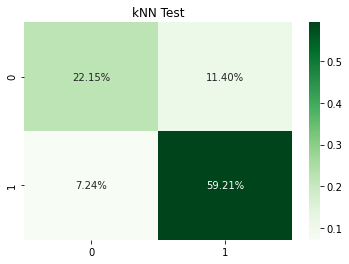

In [325]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('kNN Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('kNN Test')
plt.show()

In [326]:
knn_test_accuracy = knn_model.score(X_test, y_test)
knn_test_accuracy
knn_train_accuracy = knn_model.score(X_train, y_train)
knn_train_accuracy
knn_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
knn_train_df=pd.DataFrame(knn_metrics_train).transpose()
knn_train_f1=round(knn_train_df.loc["1"][2],2)
knn_train_recall=round(knn_train_df.loc["1"][1],2)
knn_train_precision=round(knn_train_df.loc["1"][0],2)
print ('knn_train_accuracy ',knn_train_accuracy)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)
knn_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
knn_test_df=pd.DataFrame(knn_metrics_test).transpose()
knn_test_f1=round(knn_test_df.loc["1"][2],2)
knn_test_recall=round(knn_test_df.loc["1"][1],2)
knn_test_precision=round(knn_test_df.loc["1"][0],2)
print ('knn_test_accuracy ',knn_test_accuracy)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_train_accuracy  0.8661639962299718
knn_train_precision  0.9
knn_train_recall  0.92
knn_train_f1  0.91
knn_test_accuracy  0.8135964912280702
knn_test_precision  0.84
knn_test_recall  0.89
knn_test_f1  0.86


# Naive Bias

In [327]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [328]:
ytrain_predict = nb_model.predict(X_train)
ytest_predict = nb_model.predict(X_test)

AUC for the Training Data: 0.888
AUC for the Test Data: 0.877


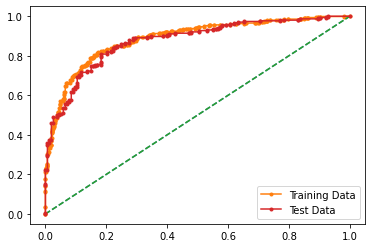

In [329]:
# AUC and ROC for the training data

# calculate AUC
probs = nb_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
nb_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % nb_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = nb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
nb_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % nb_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

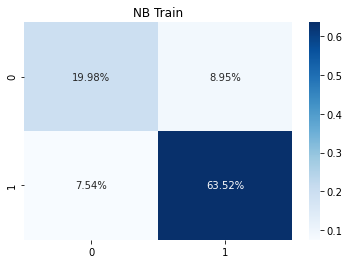

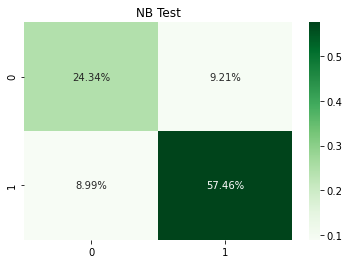

In [330]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('NB Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('NB Test')
plt.show()


In [331]:
nb_test_accuracy = nb_model.score(X_test, y_test)
nb_test_accuracy
nb_train_accuracy = nb_model.score(X_train, y_train)
nb_train_accuracy
nb_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
nb_train_df=pd.DataFrame(nb_metrics_train).transpose()
nb_train_f1=round(nb_train_df.loc["1"][2],2)
nb_train_recall=round(nb_train_df.loc["1"][1],2)
nb_train_precision=round(nb_train_df.loc["1"][0],2)
print ('nb_train_accuracy ',nb_train_accuracy)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)
nb_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
nb_test_df=pd.DataFrame(nb_metrics_test).transpose()
nb_test_f1=round(nb_test_df.loc["1"][2],2)
nb_test_recall=round(nb_test_df.loc["1"][1],2)
nb_test_precision=round(nb_test_df.loc["1"][0],2)
print ('nb_test_accuracy ',nb_test_accuracy)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_train_accuracy  0.8350612629594723
nb_train_precision  0.88
nb_train_recall  0.89
nb_train_f1  0.89
nb_test_accuracy  0.8179824561403509
nb_test_precision  0.86
nb_test_recall  0.86
nb_test_f1  0.86


In [332]:
knn_nb_data = pd.DataFrame({
   'knn Train':[knn_train_accuracy,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
       'knn Test':[knn_test_accuracy,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
   'Naive bayes Train':[nb_train_accuracy,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
       'Naive bayes  Test':[nb_test_accuracy,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
                    },index=index)
round(knn_nb_data*100,2)

,knn Train,knn Test,Naive bayes Train,Naive bayes Test
Accuracy,86.62,81.36,83.51,81.80
AUC,93.01,88.19,88.76,87.65
Recall,92.00,89.00,89.00,86.00
Precision,90.00,84.00,88.00,86.00
F1 Score,91.00,86.00,89.00,86.00


# 1.4 & 1.5 Hyper Parametrizing on the Models using Grid Search

# Logistic Regression

In [120]:
X

,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male,age_grp
0,3,3,4,1,2,2,0,2
1,4,4,4,4,5,2,1,1
2,4,4,5,2,3,2,1,1
3,4,2,2,1,4,0,0,0
4,2,2,1,1,6,2,1,2
...,...,...,...,...,...,...,...,...
1520,5,3,2,4,11,3,1,4
1521,2,2,4,4,8,2,1,5
1522,3,3,5,4,2,2,1,1
1523,3,3,1,4,11,2,1,4


In [121]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: vote_Labour, Length: 1517, dtype: uint8

In [244]:
from sklearn.model_selection import GridSearchCV

In [245]:
params = {'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty':['l1', 'l2', 'elasticnet'],
          'max_iter':[500,1000,1500]
         }

In [246]:
import sklearn.linear_model as sk
logreg = sk.LogisticRegressionCV()
grid_search = GridSearchCV(estimator = logreg, param_grid = params, cv = 3,n_jobs=2)
#logis_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, class_weight='balanced',tol=0.00001)


In [247]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegressionCV(), n_jobs=2,
             param_grid={'max_iter': [500, 1000, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [248]:
grid_search.best_params_

{'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

In [249]:
grid_search.best_estimator_

LogisticRegressionCV(max_iter=500, penalty='l1', solver='saga')

In [250]:
logis_model = grid_search.best_estimator_

In [251]:
ytrain_predict = logis_model.predict(X_train)
ytest_predict = logis_model.predict(X_test)

In [252]:
ytest_predict_prob=logis_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.363340,0.636660
1,0.170945,0.829055
2,0.014161,0.985839
3,0.740968,0.259032
4,0.169236,0.830764


In [253]:
logis_model.score(X_train, y_train)

0.8322337417530632

AUC for the Training Data: 0.887
AUC for the Test Data: 0.882


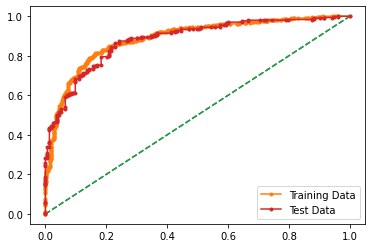

In [254]:
# AUC and ROC for the training data

# calculate AUC
probs = logis_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
logr_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % logr_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = logis_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
logr_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % logr_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [255]:
logis_model.score(X_test, y_test)

0.8135964912280702

Text(0.5, 1.0, 'Logistic Train')

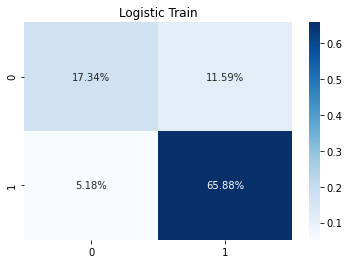

In [256]:
cf_train=confusion_matrix(y_train, ytrain_predict)
cf_train
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('Logistic Train')


In [257]:
cf_train

array([[184, 123],
       [ 55, 699]], dtype=int64)

Text(0.5, 1.0, 'Logistic Test')

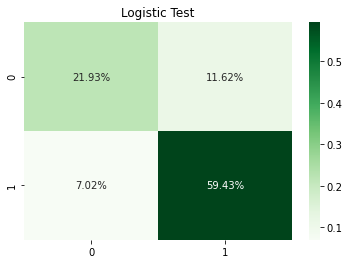

In [258]:
cf_test=confusion_matrix(y_test, ytest_predict)
cf_test
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('Logistic Test')

In [259]:
print(classification_report(y_train, ytrain_predict))
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67       307
           1       0.85      0.93      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.83      0.83      0.83      1061

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [260]:
logr_test_accuracy = logis_model.score(X_test, y_test)
logr_test_accuracy
logr_train_accuracy = logis_model.score(X_train, y_train)
logr_train_accuracy
logr_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
logr_train_df=pd.DataFrame(logr_metrics_train).transpose()
logr_train_f1=round(logr_train_df.loc["1"][2],2)
logr_train_recall=round(logr_train_df.loc["1"][1],2)
logr_train_precision=round(logr_train_df.loc["1"][0],2)
print ('logr_train_accuracy ',logr_train_accuracy)
print ('logr_train_precision ',logr_train_precision)
print ('logr_train_recall ',logr_train_recall)
print ('logr_train_f1 ',logr_train_f1)
logr_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
logr_test_df=pd.DataFrame(logr_metrics_test).transpose()
logr_test_f1=round(logr_test_df.loc["1"][2],2)
logr_test_recall=round(logr_test_df.loc["1"][1],2)
logr_test_precision=round(logr_test_df.loc["1"][0],2)
print ('logr_test_accuracy ',logr_test_accuracy)
print ('logr_test_precision ',logr_test_precision)
print ('logr_test_recall ',logr_test_recall)
print ('logr_test_f1 ',logr_test_f1)

logr_train_accuracy  0.8322337417530632
logr_train_precision  0.85
logr_train_recall  0.93
logr_train_f1  0.89
logr_test_accuracy  0.8135964912280702
logr_test_precision  0.84
logr_test_recall  0.89
logr_test_f1  0.86


Text(0.5, 1.0, 'Cross-Validation-Logistic')

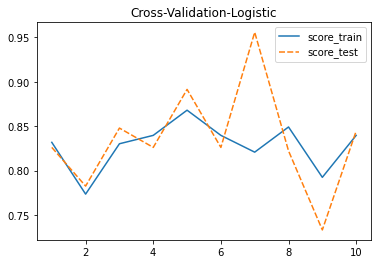

In [284]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(logis_model, X_train, y_train, cv=10)
scores_test = cross_val_score(logis_model, X_test, y_test, cv=10)
logis_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
logis_df_score
sns.lineplot(data=logis_df_score)
plt.title('Cross-Validation-Logistic')

In [262]:
logis_df_score

,score_train,score_test
1,0.831776,0.826087
2,0.773585,0.782609
3,0.830189,0.847826
4,0.839623,0.826087
5,0.867925,0.891304
6,0.839623,0.826087
7,0.820755,0.955556
8,0.849057,0.822222
9,0.792453,0.733333
10,0.839623,0.844444


# LDA Model


In [276]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [277]:
params = {'solver' :['svd','lsqr','eigen'],
          'shrinkage': ['auto', 0, 0.5, 1]
         }

In [278]:
ldareg = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = ldareg, param_grid = params, cv = 3,n_jobs=2)
#lda = LinearDiscriminantAnalysis()
#lda_model=lda.fit(X_train,y_train)

In [279]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'shrinkage': ['auto', 0, 0.5, 1],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [280]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [281]:
lda_model=grid_search.best_estimator_

In [282]:
lda_model.score(X_train, y_train)

0.8303487276154571

AUC for the Training Data: 0.889
AUC for the Test Data: 0.887


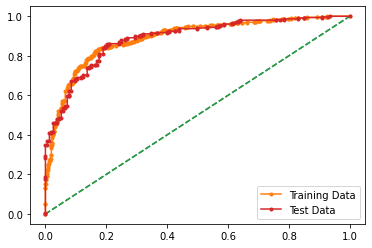

In [269]:
# AUC and ROC for the training data

# calculate AUC
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
lda_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
lda_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [270]:
lda_model.score(X_test, y_test)

0.8355263157894737

In [271]:
ytrain_predict = lda_model.predict(X_train)
ytest_predict = lda_model.predict(X_test)


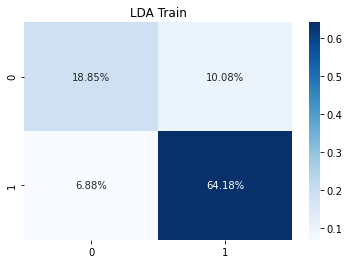

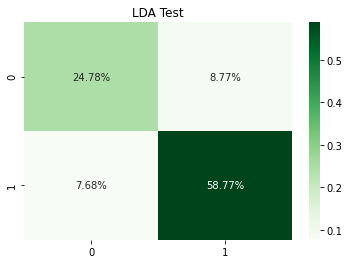

In [272]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('LDA Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('LDA Test')
plt.show()

In [273]:
lda_test_accuracy = lda_model.score(X_test, y_test)
lda_test_accuracy
lda_train_accuracy = lda_model.score(X_train, y_train)
lda_train_accuracy
lda_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
lda_train_df=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(lda_train_df.loc["1"][2],2)
lda_train_recall=round(lda_train_df.loc["1"][1],2)
lda_train_precision=round(lda_train_df.loc["1"][0],2)
print ('lda_train_accuracy ',lda_train_accuracy)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
lda_test_df=pd.DataFrame(lda_metrics_test).transpose()
lda_test_f1=round(lda_test_df.loc["1"][2],2)
lda_test_recall=round(lda_test_df.loc["1"][1],2)
lda_test_precision=round(lda_test_df.loc["1"][0],2)
print ('lda_test_accuracy ',lda_test_accuracy)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_train_accuracy  0.8303487276154571
lda_train_precision  0.86
lda_train_recall  0.9
lda_train_f1  0.88
lda_test_accuracy  0.8355263157894737
lda_test_precision  0.87
lda_test_recall  0.88
lda_test_f1  0.88


Text(0.5, 1.0, 'Cross-Validation-LDA')

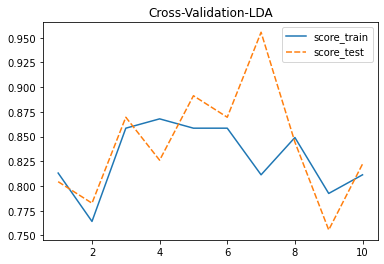

In [283]:
scores_train = cross_val_score(lda_model, X_train, y_train, cv=10)
scores_test = cross_val_score(lda_model, X_test, y_test, cv=10)
lda_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
lda_df_score
sns.lineplot(data=lda_df_score)
plt.title('Cross-Validation-LDA')

In [275]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
log_lda_data = pd.DataFrame({'LogR Train':[logr_train_accuracy,logr_train_auc,logr_train_recall,logr_train_precision,logr_train_f1],
        'LogR Test':[logr_test_accuracy,logr_test_auc,logr_test_recall,logr_test_precision,logr_test_f1],
       'LDA Train':[lda_train_accuracy,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_accuracy,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(log_lda_data*100,2)

,LogR Train,LogR Test,LDA Train,LDA Test
Accuracy,83.22,81.36,83.03,83.55
AUC,88.72,88.17,88.89,88.69
Recall,93.00,89.00,90.00,88.00
Precision,85.00,84.00,86.00,87.00
F1 Score,89.00,86.00,88.00,88.00


# kNN

In [334]:

from sklearn.model_selection import train_test_split, GridSearchCV


In [335]:
params = {'n_neighbors' :[5,7,9,11,13,15,20],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size':np.arange(20,50,5),
          'p':[1,2]
         }
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = params, cv = 3,n_jobs=2)
#knn_model = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
#knn_model.fit(X_train, y_train)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([20, 25, 30, 35, 40, 45]),
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 20],
                         'p': [1, 2]})

In [336]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=25, n_neighbors=15, p=1)

In [337]:
knn_model=grid_search.best_estimator_

In [338]:
predicted_labels = knn_model.predict(X_test)
knn_model.score(X_test, y_test)

0.8267543859649122

In [339]:
ytrain_predict = knn_model.predict(X_train)
ytest_predict = knn_model.predict(X_test)

AUC for the Training Data: 0.909
AUC for the Test Data: 0.899


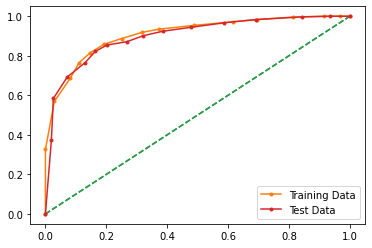

In [340]:
# AUC and ROC for the training data

# calculate AUC
probs = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
knn_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % knn_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
knn_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % knn_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

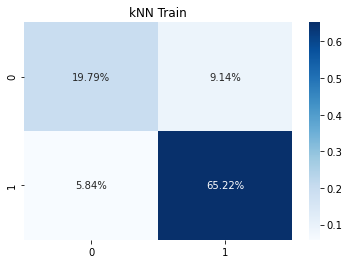

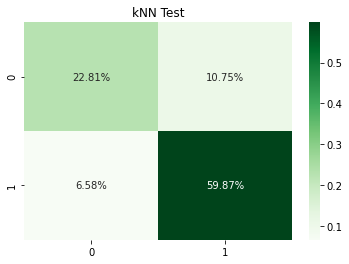

In [341]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('kNN Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('kNN Test')
plt.show()

In [342]:
from sklearn.neighbors import KNeighborsClassifier
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,28,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)
    print(k,'- ',ac_scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]  
MCE

1 -  [0.7872807017543859]
3 -  [0.7872807017543859, 0.8157894736842105]
5 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702]
7 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315]
9 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315, 0.8201754385964912]
11 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315, 0.8201754385964912, 0.8157894736842105]
13 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315, 0.8201754385964912, 0.8157894736842105, 0.8201754385964912]
15 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315, 0.8201754385964912, 0.8157894736842105, 0.8201754385964912, 0.8245614035087719]
17 -  [0.7872807017543859, 0.8157894736842105, 0.8135964912280702, 0.8223684210526315, 0.8201754385964912, 0.8157894736842105, 0.8201754385964912, 0.8245614035087719, 0.8267543859649122]
19 -  [0.7872807017543859, 0.8157894736842

[0.21271929824561409,
 0.1842105263157895,
 0.1864035087719298,
 0.17763157894736847,
 0.17982456140350878,
 0.1842105263157895,
 0.17982456140350878,
 0.17543859649122806,
 0.17324561403508776,
 0.17324561403508776,
 0.16885964912280704,
 0.17543859649122806,
 0.16885964912280704,
 0.16666666666666663]

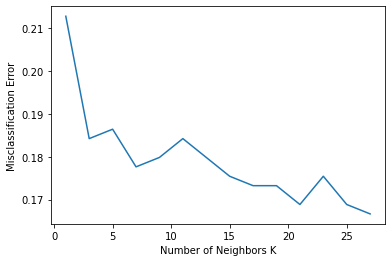

In [343]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,28,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [344]:
knn_test_accuracy = knn_model.score(X_test, y_test)
knn_test_accuracy
knn_train_accuracy = knn_model.score(X_train, y_train)
knn_train_accuracy
knn_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
knn_train_df=pd.DataFrame(knn_metrics_train).transpose()
knn_train_f1=round(knn_train_df.loc["1"][2],2)
knn_train_recall=round(knn_train_df.loc["1"][1],2)
knn_train_precision=round(knn_train_df.loc["1"][0],2)
print ('knn_train_accuracy ',knn_train_accuracy)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)
knn_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
knn_test_df=pd.DataFrame(knn_metrics_test).transpose()
knn_test_f1=round(knn_test_df.loc["1"][2],2)
knn_test_recall=round(knn_test_df.loc["1"][1],2)
knn_test_precision=round(knn_test_df.loc["1"][0],2)
print ('knn_test_accuracy ',knn_test_accuracy)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_train_accuracy  0.8501413760603205
knn_train_precision  0.88
knn_train_recall  0.92
knn_train_f1  0.9
knn_test_accuracy  0.8267543859649122
knn_test_precision  0.85
knn_test_recall  0.9
knn_test_f1  0.87


Text(0.5, 1.0, 'kNN-Cross Validation')

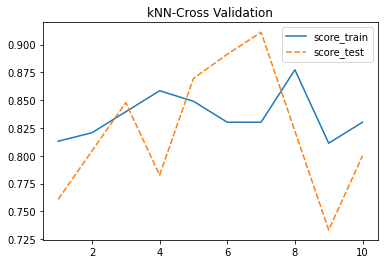

In [345]:
scores_train = cross_val_score(knn_model, X_train, y_train, cv=10)
scores_test = cross_val_score(knn_model, X_test, y_test, cv=10)
knn_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
lda_df_score
sns.lineplot(data=knn_df_score)
plt.title('kNN-Cross Validation')

# **Gaussian Naive Bayes**

In [346]:
from sklearn.naive_bayes import GaussianNB


In [347]:
params = {'var_smoothing': [1e-9, 1e-8, 1e-5, 1e-1]
         }
GNB = GaussianNB()
grid_search = GridSearchCV(estimator = GNB, param_grid = params, cv = 3,n_jobs=2)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=2,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-05, 0.1]})

In [348]:
nb_model=grid_search.best_estimator_

In [349]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.1)

In [350]:
predicted_labels = nb_model.predict(X_test)
nb_model.score(X_test, y_test)

0.8223684210526315

In [351]:
ytrain_predict = nb_model.predict(X_train)
ytest_predict = nb_model.predict(X_test)

AUC for the Training Data: 0.877
AUC for the Test Data: 0.875


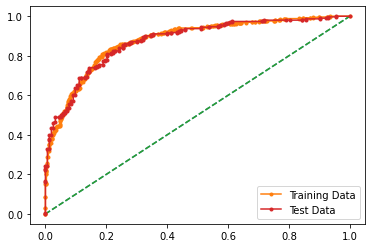

In [352]:
# AUC and ROC for the training data

# calculate AUC
probs = nb_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
nb_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % nb_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = nb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
nb_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % nb_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

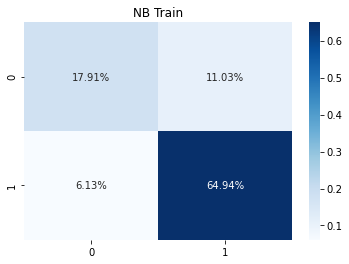

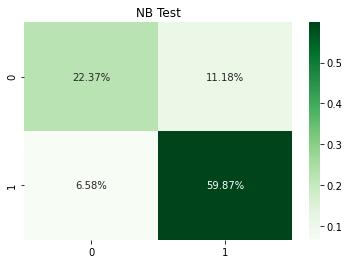

In [353]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('NB Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('NB Test')
plt.show()

In [354]:
nb_test_accuracy = nb_model.score(X_test, y_test)
nb_test_accuracy
nb_train_accuracy = nb_model.score(X_train, y_train)
nb_train_accuracy
nb_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
nb_train_df=pd.DataFrame(nb_metrics_train).transpose()
nb_train_f1=round(nb_train_df.loc["1"][2],2)
nb_train_recall=round(nb_train_df.loc["1"][1],2)
nb_train_precision=round(nb_train_df.loc["1"][0],2)
print ('nb_train_accuracy ',nb_train_accuracy)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)
nb_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
nb_test_df=pd.DataFrame(nb_metrics_test).transpose()
nb_test_f1=round(nb_test_df.loc["1"][2],2)
nb_test_recall=round(nb_test_df.loc["1"][1],2)
nb_test_precision=round(nb_test_df.loc["1"][0],2)
print ('nb_test_accuracy ',nb_test_accuracy)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_train_accuracy  0.8284637134778511
nb_train_precision  0.85
nb_train_recall  0.91
nb_train_f1  0.88
nb_test_accuracy  0.8223684210526315
nb_test_precision  0.84
nb_test_recall  0.9
nb_test_f1  0.87


Text(0.5, 1.0, 'Naive Bayes Cross validation')

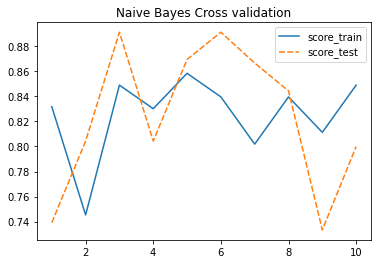

In [356]:
scores_train = cross_val_score(nb_model, X_train, y_train, cv=10)
scores_test = cross_val_score(nb_model, X_test, y_test, cv=10)
nb_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
nb_df_score
sns.lineplot(data=nb_df_score)
plt.title('Naive Bayes Cross validation')

In [357]:
hyper_parameter_data = pd.DataFrame({
	   'knn Train':[knn_train_accuracy,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
       'knn Test':[knn_test_accuracy,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
	   'Naive bayes Train':[nb_train_accuracy,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
       'Naive bayes  Test':[nb_test_accuracy,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1], 
                    },index=index)
round(hyper_parameter_data*100,2)

,knn Train,knn Test,Naive bayes Train,Naive bayes Test
Accuracy,85.01,82.68,82.85,82.24
AUC,90.89,89.93,87.73,87.49
Recall,92.00,90.00,91.00,90.00
Precision,88.00,85.00,85.00,84.00
F1 Score,90.00,87.00,88.00,87.00


# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [358]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


# Default parameters Random Forest

In [361]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [362]:
ytrain_predict = rf_model.predict(X_train)
ytest_predict = rf_model.predict(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.893


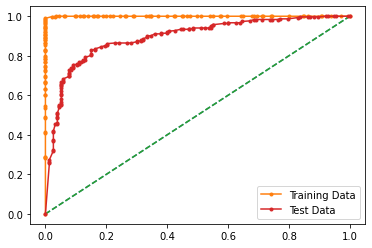

In [363]:
# AUC and ROC for the training data

# calculate AUC
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
rf_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
rf_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [364]:
rf_test_accuracy = rf_model.score(X_test, y_test)
rf_test_accuracy
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_train_accuracy
rf_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
rf_train_df=pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(rf_train_df.loc["1"][2],2)
rf_train_recall=round(rf_train_df.loc["1"][1],2)
rf_train_precision=round(rf_train_df.loc["1"][0],2)
print ('rf_train_accuracy ',rf_train_accuracy)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
rf_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
rf_test_df=pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(rf_test_df.loc["1"][2],2)
rf_test_recall=round(rf_test_df.loc["1"][1],2)
rf_test_precision=round(rf_test_df.loc["1"][0],2)
print ('rf_test_accuracy ',rf_test_accuracy)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_train_accuracy  0.9924599434495759
rf_train_precision  0.99
rf_train_recall  1.0
rf_train_f1  0.99
rf_test_accuracy  0.8223684210526315
rf_test_precision  0.84
rf_test_recall  0.9
rf_test_f1  0.87


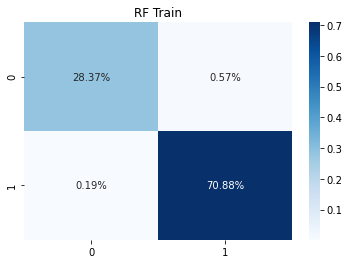

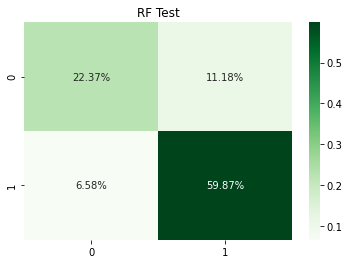

In [365]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('RF Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('RF Test')
plt.show()

In [367]:
Performance_metrtics = pd.DataFrame({
       'Random Forest Train':[rf_train_accuracy,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Random Forest  Test':[rf_test_accuracy,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
                    },index=index)
round(Performance_metrtics*100,2)

,Random Forest Train,Random Forest Test
Accuracy,99.25,82.24
AUC,99.98,89.34
Recall,100.00,90.00
Precision,99.00,84.00
F1 Score,99.00,87.00


<AxesSubplot:>

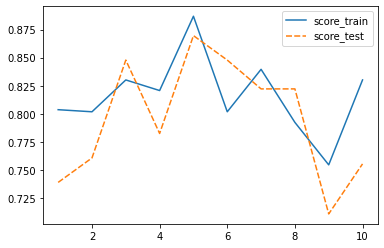

In [366]:
scores_train = cross_val_score(rf_model, X_train, y_train, cv=10)
scores_test = cross_val_score(rf_model, X_test, y_test, cv=10)
rf_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
rf_df_score
sns.lineplot(data=rf_df_score)

# Hyper Parameters

In [388]:
params = {'min_samples_leaf': [2, 3, 4, 5,10,25,50,100],
          'min_samples_split':[2,3,4,10,25,50,75,100,125],
          'n_estimators': np.arange(50,300,20),
          'criterion': ['entropy','gini'],
          'max_features': ["auto", "sqrt", "log2"]}

In [389]:
rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train)
rf_model=grid_search.best_estimator_

In [390]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=3, n_estimators=130)

In [391]:
predicted_labels = rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.8289473684210527

In [392]:
ytrain_predict = rf_model.predict(X_train)
ytest_predict = rf_model.predict(X_test)

AUC for the Training Data: 0.944
AUC for the Test Data: 0.898


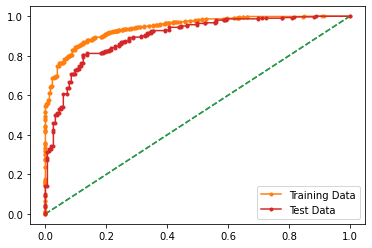

In [393]:
# AUC and ROC for the training data

# calculate AUC
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
rf_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
rf_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [394]:
rf_test_accuracy = rf_model.score(X_test, y_test)
rf_test_accuracy
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_train_accuracy
rf_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
rf_train_df=pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(rf_train_df.loc["1"][2],2)
rf_train_recall=round(rf_train_df.loc["1"][1],2)
rf_train_precision=round(rf_train_df.loc["1"][0],2)
print ('rf_train_accuracy ',rf_train_accuracy)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
rf_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
rf_test_df=pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(rf_test_df.loc["1"][2],2)
rf_test_recall=round(rf_test_df.loc["1"][1],2)
rf_test_precision=round(rf_test_df.loc["1"][0],2)
print ('rf_test_accuracy ',rf_test_accuracy)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_train_accuracy  0.8746465598491989
rf_train_precision  0.89
rf_train_recall  0.94
rf_train_f1  0.91
rf_test_accuracy  0.8289473684210527
rf_test_precision  0.84
rf_test_recall  0.91
rf_test_f1  0.88


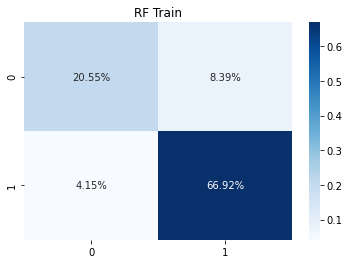

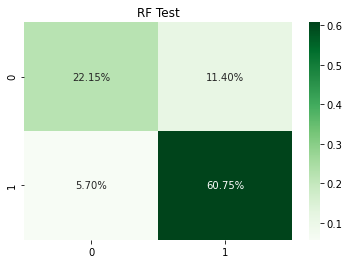

In [395]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('RF Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('RF Test')
plt.show()

In [396]:
Performance_metrtics = pd.DataFrame({
       'Random Forest Train':[rf_train_accuracy,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Random Forest  Test':[rf_test_accuracy,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
                    },index=index)
round(Performance_metrtics*100,2)

,Random Forest Train,Random Forest Test
Accuracy,87.46,82.89
AUC,94.44,89.82
Recall,94.00,91.00
Precision,89.00,84.00
F1 Score,91.00,88.00


<AxesSubplot:>

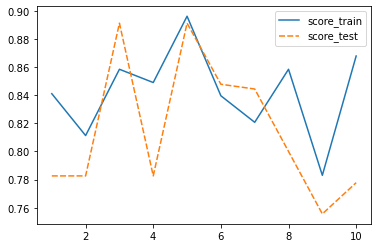

In [397]:
scores_train = cross_val_score(rf_model, X_train, y_train, cv=10)
scores_test = cross_val_score(rf_model, X_test, y_test, cv=10)
rf_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
rf_df_score
sns.lineplot(data=rf_df_score)

# Bagging Using Best Parameters of Random Forest

In [398]:

Bagging_model=BaggingClassifier(base_estimator=rf_model,n_estimators=500, random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        min_samples_leaf=5,
                                                        min_samples_split=3,
                                                        n_estimators=130),
                  n_estimators=500, random_state=1)

In [399]:
predicted_labels = Bagging_model.predict(X_test)
Bagging_model.score(X_test, y_test)

0.8245614035087719

In [400]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

AUC for the Training Data: 0.931
AUC for the Test Data: 0.895


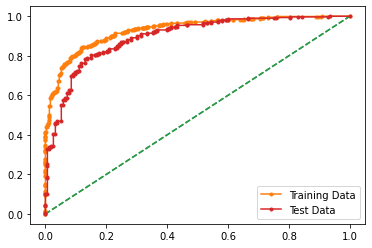

In [401]:
# AUC and ROC for the training data

# calculate AUC
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
bagging_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % bagging_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
bagging_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % bagging_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

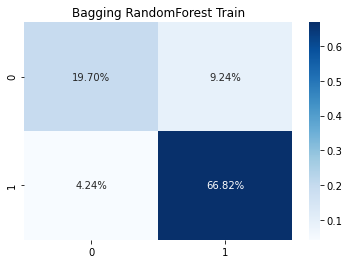

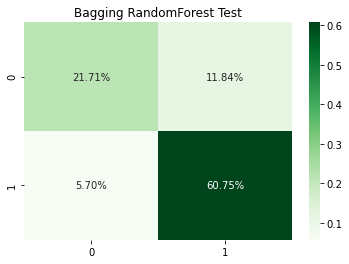

In [402]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('Bagging RandomForest Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('Bagging RandomForest Test')
plt.show()

In [403]:
bagging_test_accuracy = Bagging_model.score(X_test, y_test)
bagging_test_accuracy
bagging_train_accuracy = Bagging_model.score(X_train, y_train)
bagging_train_accuracy
bagging_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
bagging_train_df=pd.DataFrame(bagging_metrics_train).transpose()
bagging_train_f1=round(bagging_train_df.loc["1"][2],2)
bagging_train_recall=round(bagging_train_df.loc["1"][1],2)
bagging_train_precision=round(bagging_train_df.loc["1"][0],2)
print ('bagging_train_accuracy ',bagging_train_accuracy)
print ('bagging_train_precision ',bagging_train_precision)
print ('bagging_train_recall ',bagging_train_recall)
print ('bagging_train_f1 ',bagging_train_f1)
bagging_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
bagging_test_df=pd.DataFrame(bagging_metrics_test).transpose()
bagging_test_f1=round(bagging_test_df.loc["1"][2],2)
bagging_test_recall=round(bagging_test_df.loc["1"][1],2)
bagging_test_precision=round(bagging_test_df.loc["1"][0],2)
print ('bagging_test_accuracy ',bagging_test_accuracy)
print ('bagging_test_precision ',bagging_test_precision)
print ('bagging_test_recall ',bagging_test_recall)
print ('bagging_test_f1 ',bagging_test_f1)

bagging_train_accuracy  0.8652214891611687
bagging_train_precision  0.88
bagging_train_recall  0.94
bagging_train_f1  0.91
bagging_test_accuracy  0.8245614035087719
bagging_test_precision  0.84
bagging_test_recall  0.91
bagging_test_f1  0.87


<AxesSubplot:>

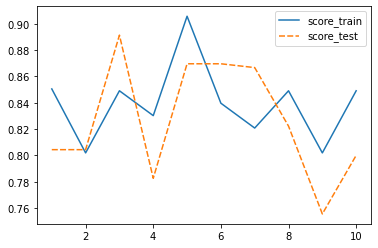

In [404]:
scores_train = cross_val_score(Bagging_model, X_train, y_train, cv=10)
scores_test = cross_val_score(Bagging_model, X_test, y_test, cv=10)
bagging_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
bagging_df_score
sns.lineplot(data=bagging_df_score)

In [405]:
data = pd.DataFrame({
  'Bagging RF Train':[bagging_train_accuracy,bagging_train_auc,bagging_train_recall,bagging_train_precision,bagging_train_f1],
    'Bagging RF Test':[bagging_test_accuracy,bagging_test_auc,bagging_test_recall,bagging_test_precision,bagging_test_f1],  
                    },index=index)
round(data*100,2)

,Bagging RF Train,Bagging RF Test
Accuracy,86.52,82.46
AUC,93.09,89.49
Recall,94.00,91.00
Precision,88.00,84.00
F1 Score,91.00,87.00


# AdaBoost

In [406]:
from sklearn.ensemble import AdaBoostClassifier


In [407]:
params = {'n_estimators': [100, 300, 400, 500],
          'learning_rate':[0.1,.2,.3,.4],
          'algorithm':['SAMME', 'SAMME.R']}
ADB = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = ADB, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train)
ADB_model=grid_search.best_estimator_

In [408]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.2, n_estimators=300)

In [409]:
predicted_labels = ADB_model.predict(X_test)
ADB_model.score(X_test, y_test)

0.8245614035087719

In [410]:
ytrain_predict = ADB_model.predict(X_train)
ytest_predict = ADB_model.predict(X_test)

AUC for the Training Data: 0.905
AUC for the Test Data: 0.884


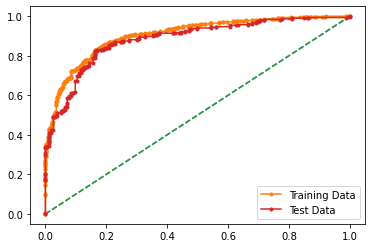

In [411]:
# AUC and ROC for the training data

# calculate AUC
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
adaboost_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % adaboost_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
adaboost_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % adaboost_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

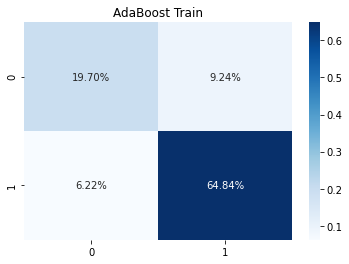

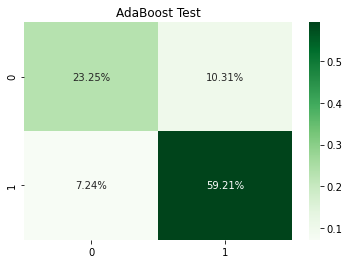

In [412]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('AdaBoost Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('AdaBoost Test')
plt.show()

In [413]:
adaboosting_test_accuracy = ADB_model.score(X_test, y_test)
adaboosting_test_accuracy
adaboosting_train_accuracy = ADB_model.score(X_train, y_train)
adaboosting_train_accuracy
adaboosting_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
adaboosting_train_df=pd.DataFrame(adaboosting_metrics_train).transpose()
adaboosting_train_f1=round(adaboosting_train_df.loc["1"][2],2)
adaboosting_train_recall=round(adaboosting_train_df.loc["1"][1],2)
adaboosting_train_precision=round(adaboosting_train_df.loc["1"][0],2)
print ('adaboosting_train_accuracy ',adaboosting_train_accuracy)
print ('adaboosting_train_precision ',adaboosting_train_precision)
print ('adaboosting_train_recall ',adaboosting_train_recall)
print ('adaboosting_train_f1 ',adaboosting_train_f1)
adaboosting_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
adaboosting_test_df=pd.DataFrame(adaboosting_metrics_test).transpose()
adaboosting_test_f1=round(adaboosting_test_df.loc["1"][2],2)
adaboosting_test_recall=round(adaboosting_test_df.loc["1"][1],2)
adaboosting_test_precision=round(adaboosting_test_df.loc["1"][0],2)
print ('adaboosting_test_accuracy ',adaboosting_test_accuracy)
print ('adaboosting_test_precision ',adaboosting_test_precision)
print ('adaboosting_test_recall ',adaboosting_test_recall)
print ('adaboosting_test_f1 ',adaboosting_test_f1)

adaboosting_train_accuracy  0.8454288407163054
adaboosting_train_precision  0.88
adaboosting_train_recall  0.91
adaboosting_train_f1  0.89
adaboosting_test_accuracy  0.8245614035087719
adaboosting_test_precision  0.85
adaboosting_test_recall  0.89
adaboosting_test_f1  0.87


<AxesSubplot:>

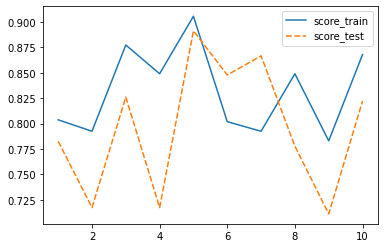

In [414]:
scores_train = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores_test = cross_val_score(ADB_model, X_test, y_test, cv=10)
adboost_df_score=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
adboost_df_score
sns.lineplot(data=adboost_df_score)

In [415]:
adboost_df_score

,score_train,score_test
1,0.803738,0.782609
2,0.792453,0.717391
3,0.877358,0.826087
4,0.849057,0.717391
5,0.905660,0.891304
6,0.801887,0.847826
7,0.792453,0.866667
8,0.849057,0.777778
9,0.783019,0.711111
10,0.867925,0.822222


In [416]:
from sklearn.ensemble import GradientBoostingClassifier

In [417]:
params = {'n_estimators': [100, 300, 400, 500],
          'learning_rate':[0.1,.2,.3,.4],
          'loss':['deviance', 'exponential'],
          'criterion':['friedman_mse', 'squared_error','mse','mae']        
         }
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = gbc, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train)
gbc_model=grid_search.best_estimator_
grid_search.best_estimator_

GradientBoostingClassifier(loss='exponential')

In [418]:
predicted_labels = gbcl_model.predict(X_test)
gbcl_model.score(X_test, y_test)

ytrain_predict = gbcl_model.predict(X_train)
ytest_predict = gbcl_model.predict(X_test)

AUC for the Training Data: 0.932
AUC for the Test Data: 0.897


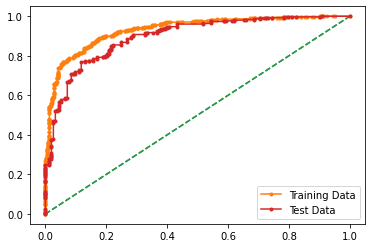

In [419]:
# calculate AUC
probs = gbcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
gbcl_train_auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % gbcl_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs = gbcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
gbcl_test_auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % gbcl_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


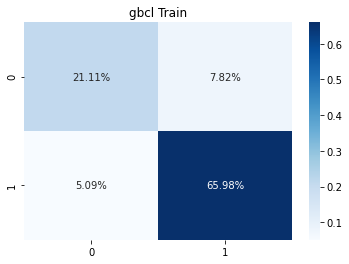

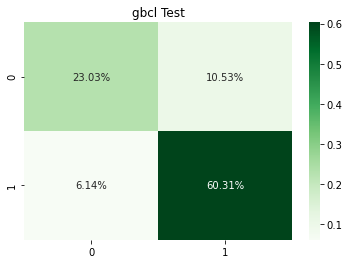

In [420]:
cf_train=confusion_matrix(y_train, ytrain_predict)
sns.heatmap(cf_train/np.sum(cf_train), annot=True,fmt='.2%', cmap='Blues');
plt.title('gbcl Train')
plt.show()
cf_test=confusion_matrix(y_test, ytest_predict)
sns.heatmap(cf_test/np.sum(cf_test), annot=True,fmt='.2%', cmap='Greens');
plt.title('gbcl Test')
plt.show()

In [421]:
gbcl_test_accuracy = gbcl_model.score(X_test, y_test)
gbcl_test_accuracy
gbcl_train_accuracy = gbcl_model.score(X_train, y_train)
gbcl_train_accuracy
gbcl_metrics_train=classification_report(y_train, ytrain_predict,output_dict=True)
gbcl_train_df=pd.DataFrame(gbcl_metrics_train).transpose()
gbcl_train_f1=round(gbcl_train_df.loc["1"][2],2)
gbcl_train_recall=round(gbcl_train_df.loc["1"][1],2)
gbcl_train_precision=round(gbcl_train_df.loc["1"][0],2)
print ('gbcl_train_accuracy ',gbcl_train_accuracy)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)
gbcl_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
gbcl_test_df=pd.DataFrame(gbcl_metrics_test).transpose()
gbcl_test_f1=round(gbcl_test_df.loc["1"][2],2)
gbcl_test_recall=round(gbcl_test_df.loc["1"][1],2)
gbcl_test_precision=round(gbcl_test_df.loc["1"][0],2)
print ('gbcl_test_accuracy ',gbcl_test_accuracy)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_train_accuracy  0.8708765315739868
gbcl_train_precision  0.89
gbcl_train_recall  0.93
gbcl_train_f1  0.91
gbcl_test_accuracy  0.8333333333333334
gbcl_test_precision  0.85
gbcl_test_recall  0.91
gbcl_test_f1  0.88


In [427]:
data = pd.DataFrame({
   'Adaboost Train':[adaboosting_train_accuracy,adaboost_train_auc,adaboosting_train_recall,adaboosting_train_precision,adaboosting_train_f1],
       'Adaboost  Test':[adaboosting_test_accuracy,adaboost_test_auc,adaboosting_test_recall,adaboosting_test_precision,adaboosting_test_f1],
   'Gradientboost Train':[gbcl_train_accuracy,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
       'Gradientboost   Test':[gbcl_test_accuracy,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
                    },index=index)
round(data*100,2)

,Adaboost Train,Adaboost Test,Gradientboost Train,Gradientboost Test
Accuracy,84.54,82.46,87.09,83.33
AUC,90.53,88.41,93.22,89.72
Recall,91.00,89.00,93.00,91.00
Precision,88.00,85.00,89.00,85.00
F1 Score,89.00,87.00,91.00,88.00


<AxesSubplot:>

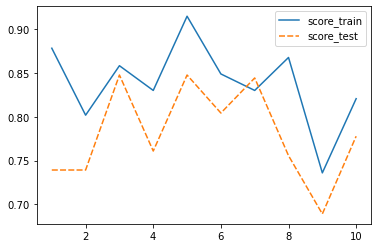

In [422]:
scores_train = cross_val_score(gbcl_model, X_train, y_train, cv=10)
scores_test = cross_val_score(gbcl_model, X_test, y_test, cv=10)
gbcl_df=pd.DataFrame({'score_train': scores_train[:], 'score_test': scores_test[:]},index=[1,2,3,4,5,6,7,8,9,10])
gbcl_df
sns.lineplot(data=gbcl_df)

# Model Comparison

In [423]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']


In [431]:
data = pd.DataFrame({'LogR Train':[logr_train_accuracy,logr_train_auc,logr_train_recall,logr_train_precision,logr_train_f1],
       'LogR Test':[logr_test_accuracy,logr_test_auc,logr_test_recall,logr_test_precision,logr_test_f1],
       'LDA Train':[lda_train_accuracy,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'LDA Test':[lda_test_accuracy,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
   'knn Train':[knn_train_accuracy,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
       'knn Test':[knn_test_accuracy,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
   'Naive bias Train':[nb_train_accuracy,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
       'Naive bias  Test':[nb_test_accuracy,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
   'Random Forest Train':[rf_train_accuracy,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Random Forest  Test':[rf_test_accuracy,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
  'Bagging RF Train':[bagging_train_accuracy,bagging_train_auc,bagging_train_recall,bagging_train_precision,bagging_train_f1],
       'Bagging RF   Test':[bagging_test_accuracy,bagging_test_auc,bagging_test_recall,bagging_test_precision,bagging_test_f1],
   'Adaboost Train':[adaboosting_train_accuracy,adaboost_train_auc,adaboosting_train_recall,adaboosting_train_precision,adaboosting_train_f1],
       'Adaboost  Test':[adaboosting_test_accuracy,adaboost_test_auc,adaboosting_test_recall,adaboosting_test_precision,adaboosting_test_f1],
   'Gradientboost Train':[gbcl_train_accuracy,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
       'Gradientboost   Test':[gbcl_test_accuracy,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
                    },index=index)
round(data*100,2)

,LogR Train,LogR Test,LDA Train,LDA Test,knn Train,knn Test,Naive bias Train,Naive bias Test,Random Forest Train,Random Forest Test,Bagging RF Train,Bagging RF Test,Adaboost Train,Adaboost Test,Gradientboost Train,Gradientboost Test
Accuracy,83.22,81.36,83.03,83.55,85.01,82.68,82.85,82.24,87.46,82.89,86.52,82.46,84.54,82.46,87.09,83.33
AUC,88.72,88.17,88.89,88.69,90.89,89.93,87.73,87.49,94.44,89.82,93.09,89.49,90.53,88.41,93.22,89.72
Recall,93.00,89.00,90.00,88.00,92.00,90.00,91.00,90.00,94.00,91.00,94.00,91.00,91.00,89.00,93.00,91.00
Precision,85.00,84.00,86.00,87.00,88.00,85.00,85.00,84.00,89.00,84.00,88.00,84.00,88.00,85.00,89.00,85.00
F1 Score,89.00,86.00,88.00,88.00,90.00,87.00,88.00,87.00,91.00,88.00,91.00,87.00,89.00,87.00,91.00,88.00


Text(0.5, 1.0, 'Naive Bias')

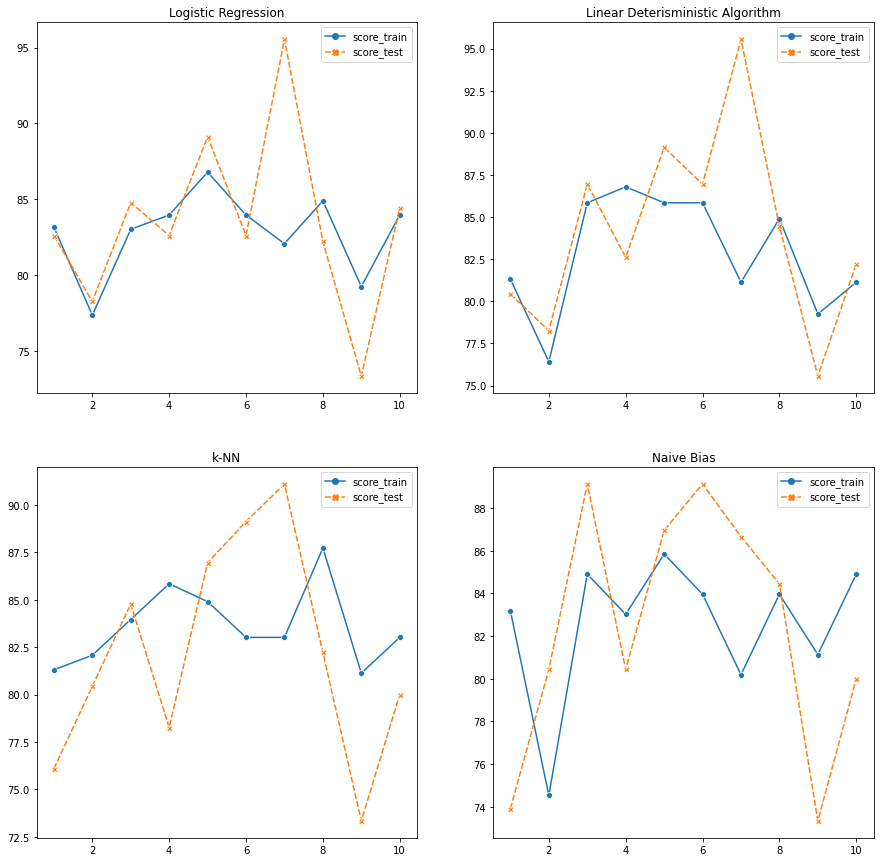

In [425]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)
a=sns.lineplot(data=logis_df_score*100, ax=axes[0][0],  markers=True)
a.set_title('Logistic Regression')
b=sns.lineplot(data=lda_df_score*100, ax=axes[0][1],  markers=True)
b.set_title('Linear Deterisministic Algorithm')
c=sns.lineplot(data=knn_df_score*100, ax=axes[1][0],  markers=True)
c.set_title('k-NN')
d=sns.lineplot(data=nb_df_score*100, ax=axes[1][1],  markers=True)
d.set_title('Naive Bias')

Text(0.5, 1.0, 'Gradient Boost')

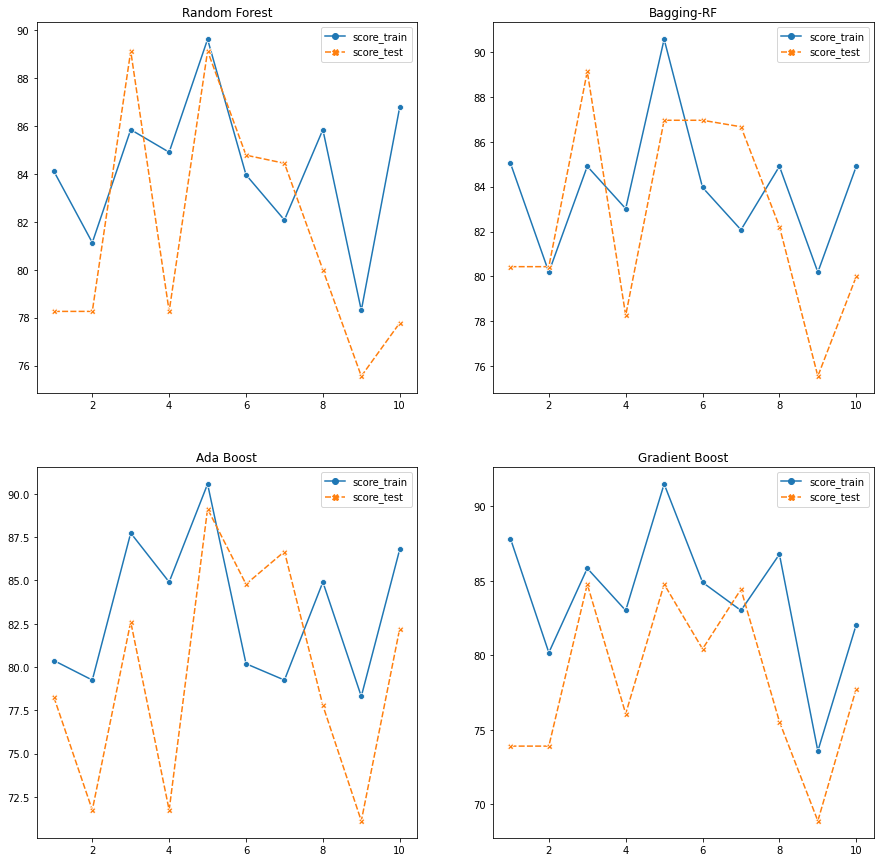

In [426]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)
a=sns.lineplot(data=rf_df_score*100, ax=axes[0][0],  markers=True)
a.set_title('Random Forest')
b=sns.lineplot(data=bagging_df_score*100, ax=axes[0][1],  markers=True)
b.set_title('Bagging-RF')
c=sns.lineplot(data=adboost_df_score*100, ax=axes[1][0],  markers=True)
c.set_title('Ada Boost')
d=sns.lineplot(data=gbcl_df*100, ax=axes[1][1],  markers=True)
d.set_title('Gradient Boost')